# Bài Tập Thực Hành Buổi 2 - Lớp 1

## IV. Làm quen với Spark DataFrame

## Bài tập 1: Tạo và thao tác với DataFrame từ JSON

In [74]:
# a. Tạo DataFrame từ nội dung của file JSON
df = spark.read.json("./examples/src/main/resources/people.json")

In [75]:
# b. Hiển thị nội dung của Dataframe ra stdout
df.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [76]:
# c. In ra stdout cấu trúc của DataFrame theo dạng cây
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [77]:
# d. Chọn duy nhất một cột "name" để hiển thị
df.select('name').show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [78]:
# e. Hiển thị toàn bộ cột với tất cả giá trị của cột "age" tăng lên 1
df.select(df['name'], df['age'] + 1).show()

+-------+---------+
|   name|(age + 1)|
+-------+---------+
|Michael|     NULL|
|   Andy|       31|
| Justin|       20|
+-------+---------+



In [79]:
# f. Lọc ra những người có tuổi lớn hơn 21
df.filter(df['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [80]:
# g. Đếm số người theo từng độ tuổi
df.groupBy('age').count().show()

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|NULL|    1|
|  30|    1|
+----+-----+



## Bài tập 2: Tạo và thao tác với DataFrame từ file CSV

In [8]:
# a. Tạo DataFrame từ nội dung của file CSV
df = spark.read.format('csv').option('header', 'true').load("./data_thuchanh/ebay.csv")

In [9]:
# b. Hiển thị nội dung của Dataframe ra stdout
df.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|  120|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|  120|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|  120|xbox|    

In [10]:
# c. In ra stdout cấu trúc của DataFrame theo dạng cây
df.printSchema()

root
 |-- auctionid: string (nullable = true)
 |-- bid: string (nullable = true)
 |-- bidtime: string (nullable = true)
 |-- bidder: string (nullable = true)
 |-- bidderrate: string (nullable = true)
 |-- openbid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- item: string (nullable = true)
 |-- daystolive: string (nullable = true)



In [11]:
# d. Đếm số cuộc đấu giá đã được tổ chức bằng câu lệnh
df.select('auctionid').distinct().count()

627

In [12]:
# e. Đếm số lượng giá đấu trên mỗi mặt hàng
df.groupBy('auctionid', 'item').count().show()

+----------+-------+-----+
| auctionid|   item|count|
+----------+-------+-----+
|1645883276|cartier|   12|
|1641242797|cartier|    5|
|1642005995|cartier|   18|
|3020060476|   palm|   22|
|1644681469|cartier|   14|
|8212145833|   xbox|   26|
|1638844464|cartier|   16|
|3020573049|   palm|    2|
|3015632013|   palm|   28|
|3024659380|   palm|   26|
|3025373736|   palm|   15|
|8213387659|   xbox|   25|
|1643201832|cartier|    4|
|3014834745|   palm|   21|
|3020257463|   palm|   16|
|3020274575|   palm|   11|
|3019821569|   palm|   27|
|3024707992|   palm|   20|
|8212277835|   xbox|    3|
|3019326870|   palm|   33|
+----------+-------+-----+
only showing top 20 rows


In [13]:
# f. Lọc và hiển thị các phiên đấu giá có giá đóng cửa lớn hơn 100
from pyspark.sql.functions import col

# Chuyển cột price sang kiểu FLOAT
df = df.withColumn("price", col("price").cast("float"))

# Lọc các phiên đấu giá có giá đóng cửa lớn hơn 100
highprice = df.filter(df['price'] > 100)
highprice.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|120.0|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|120.0|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|120.0|xbox|    

## V. Thao tác với DataFrame bằng ngôn ngữ SQL

## Bài tập 3: Thao tác với DataFrame bằng ngôn ngữ SQL (dữ liệu people ở bài tập 1)

In [14]:
# a. Tạo một khung nhìn tạm (SQL temporary view) từ DataFrame df
dfSQL = spark.read.json("./examples/src/main/resources/people.json")
dfSQL.createOrReplaceTempView("people")

In [15]:
# b. Truy vấn toàn bộ dữ liệu và kết quả
sqlDF = spark.sql("SELECT * FROM people")
sqlDF.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [16]:
# c. Chọn duy nhất một cột "name" để hiển thị
sqlName = spark.sql("SELECT name FROM people")
sqlName.show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [17]:
# d. Hiển thị toàn bộ cột với tất cả giá trị của cột "age" tăng lên 1
sqlAgeIncrease = spark.sql("""
    SELECT *, (age + 1) AS age
    FROM people
""")
sqlAgeIncrease.show()

+----+-------+----+
| age|   name| age|
+----+-------+----+
|NULL|Michael|NULL|
|  30|   Andy|  31|
|  19| Justin|  20|
+----+-------+----+



In [18]:
# e. Lọc ra những người có tuổi lớn hơn 21
sqlAge = spark.sql("""
    SELECT * FROM people
    WHERE age > 21
""")
sqlAge.show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [19]:
# f. Đếm số người theo từng độ tuổi
sqlPeopleGroupByAge = spark.sql("""
    SELECT age, COUNT(*) AS count
    FROM people
    GROUP BY age
""")
sqlPeopleGroupByAge.show()

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|NULL|    1|
|  30|    1|
+----+-----+



## Bài tập 4: Thao tác với DataFrame bằng ngôn ngữ SQL (dữ liệu ebay ở bài tập 2)

In [20]:
# a. Tạo một khung nhìn tạm (SQL temporary view) từ DataFrame df
df.createOrReplaceTempView("ebay")

In [21]:
# b. Truy vấn toàn bộ dữ liệu và kết quả
sqlDF = spark.sql("SELECT * from ebay")
sqlDF.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|120.0|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|120.0|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|120.0|xbox|    

In [22]:
# c. Đếm số cuộc đấu giá đã được tổ chức bằng câu lệnh
sqlDemDauGia = spark.sql("SELECT COUNT(DISTINCT auctionid) AS auction_count FROM ebay")
sqlDemDauGia.show()

+-------------+
|auction_count|
+-------------+
|          627|
+-------------+



In [23]:
# d. Đếm số lượng giá đấu trên mỗi mặt hàng
sqlDemGia = spark.sql("""
    SELECT auctionid, item, COUNT(*) AS count
    FROM ebay
    GROUP BY auctionid, item
""")
sqlDemGia.show()

+----------+-------+-----+
| auctionid|   item|count|
+----------+-------+-----+
|1645883276|cartier|   12|
|1641242797|cartier|    5|
|1642005995|cartier|   18|
|3020060476|   palm|   22|
|1644681469|cartier|   14|
|8212145833|   xbox|   26|
|1638844464|cartier|   16|
|3020573049|   palm|    2|
|3015632013|   palm|   28|
|3024659380|   palm|   26|
|3025373736|   palm|   15|
|8213387659|   xbox|   25|
|1643201832|cartier|    4|
|3014834745|   palm|   21|
|3020257463|   palm|   16|
|3020274575|   palm|   11|
|3019821569|   palm|   27|
|3024707992|   palm|   20|
|8212277835|   xbox|    3|
|3019326870|   palm|   33|
+----------+-------+-----+
only showing top 20 rows


In [24]:
# e. Lọc và hiển thị các phiên đấu giá có giá đóng cửa lớn hơn 100
sqlHighPrice = spark.sql("""
    SELECT *
    FROM ebay
    WHERE price > 100
    AND price IS NOT NULL
""")
sqlHighPrice.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|120.0|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|120.0|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|120.0|xbox|    

## VI. Làm quen với thư viện các thuật toán máy học (Machine Learning Library - MLLib)

## Bài tập 1: Thao tác với dữ liệu đầu vào

In [3]:
# Sử dụng biến SparkSession để đọc dữ liệu đầu vào từ tập tin csv
data = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("./data_thuchanh/data_geo.csv")
data.cache()
data.count()

294

In [11]:
# Hiển thị thông tin dữ liệu
display(data)
data.printSchema()

# Loại bỏ các dòng có giá trị trống
data = data.dropna()
data.count()

# Tạo View để truy vấn hiển thị dữ liệu
data.createOrReplaceTempView("data_geo")
df1 = spark.sql("""select City, `State Code`, `2014 Population estimate`/1000 as `2014 Pop estimate`, `2015 median sales price` from data_geo""")
display(df1)

DataFrame[2014 rank: int, City: string, State: string, State Code: string, 2014 Population estimate: int, 2015 median sales price: double]

root
 |-- 2014 rank: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- 2014 Population estimate: integer (nullable = true)
 |-- 2015 median sales price: double (nullable = true)



DataFrame[City: string, State Code: string, 2014 Pop estimate: double, 2015 median sales price: double]

In [17]:
# Tiền xử lý dữ liệu với pyspark.ml
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler

df2 = (data
       .select(
           F.col("2015 median sales price").cast("double").alias("label"),
           F.col("2014 Population estimate").cast("double").alias("pop")
       )
       .dropna())

assembler = VectorAssembler(inputCols=["pop"], outputCol="features")
data_ml = assembler.transform(df2).select("label", "features")

data_ml.printSchema()
data_ml.show(5, truncate=False)


root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

+-----+-----------+
|label|features   |
+-----+-----------+
|162.9|[212247.0] |
|157.7|[188226.0] |
|122.5|[194675.0] |
|129.0|[200481.0] |
|206.1|[1537058.0]|
+-----+-----------+
only showing top 5 rows


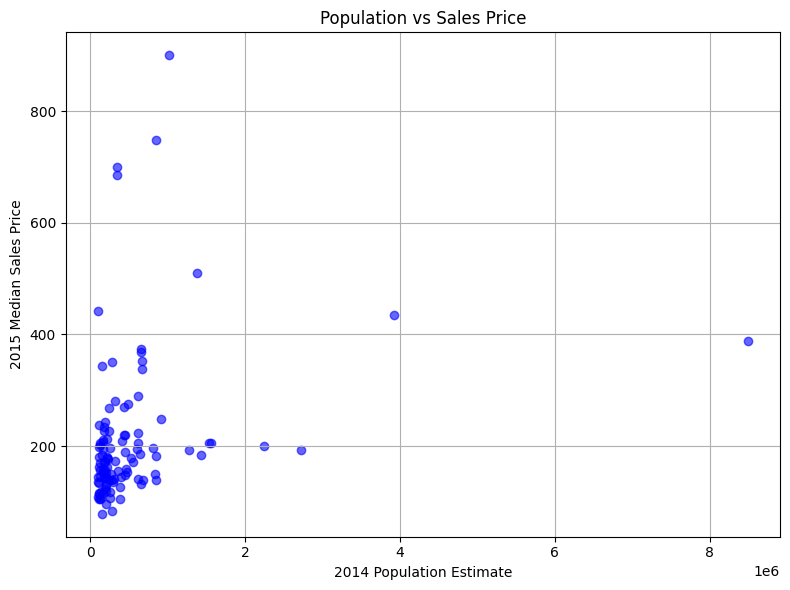

In [21]:
import matplotlib.pyplot as plt

x = data_ml.rdd.map(lambda p: float(p.features[0])).collect()
y = data_ml.rdd.map(lambda p: float(p.label)).collect()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel("2014 Population Estimate")
plt.ylabel("2015 Median Sales Price")
plt.title("Population vs Sales Price")
plt.grid(True)
plt.tight_layout()
plt.show()

## Bài tập 2: Sử dụng mô hình hồi quy tuyến tính để dự báo kết quả giá bán

In [4]:
# Chuẩn hóa dữ liệu
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler

# Tạo DataFrame phù hợp (đổi tên & ép kiểu + bỏ null)
df2 = (data
       .select(
           F.col("2015 median sales price").cast("double").alias("label"),
           F.col("2014 Population estimate").cast("double").alias("pop")
       )
       .dropna())

# Tạo cột features (vector 1 chiều từ cột 'pop')
assembler = VectorAssembler(inputCols=["pop"], outputCol="features")
data_processed = assembler.transform(df2).select("label", "features")

data_processed.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [5]:
# Thêm lớp LinearRegression từ thư viện máy học
from pyspark.ml.regression import LinearRegression

In [9]:
# Tạo biến LinearRegression để sử dụng
lr = LinearRegression()

In [10]:
# Tạo ra hai mô hình tương ứng với hai tham số
modelA = lr.fit(data_processed, {lr.regParam:0.0})
modelB = lr.fit(data_processed, {lr.regParam:100.0})

25/09/01 11:28:32 WARN Instrumentation: [4a7f051f] regParam is zero, which might cause numerical instability and overfitting.


In [11]:
# Hiển thị thông tin của hai mô hình
print(">>> ModelA intercept: {}, coefficient: {}".format(modelA.intercept, modelA.coefficients[0]))
print(">>> ModelB intercept: {}, coefficient: {}".format(modelB.intercept, modelB.coefficients[0]))

>>> ModelA intercept: 191.29427575139394, coefficient: 3.779789682338248e-05
>>> ModelB intercept: 199.85112564667153, coefficient: 2.1603499483717156e-05


In [13]:
# Hiển thị thông tin dự đoán của hai mô hình
predictionsA = modelA.transform(data_processed)
display(predictionsA)

predictionsB = modelB.transform(data_processed)
display(predictionsB)

DataFrame[label: double, features: vector, prediction: double]

DataFrame[label: double, features: vector, prediction: double]

In [14]:
## Bài tập 3: Đánh giá mô hình dự đoán

In [15]:
# Thêm lớp RegressionEvaluator từ thư viện máy học
from pyspark.ml.evaluation import RegressionEvaluator

In [16]:
# Sử dụng phương pháp tính Root Mean Squared Error để đánh giá kết quả mô hình
evaluator = RegressionEvaluator(metricName="rmse")

RMSEA = evaluator.evaluate(predictionsA)
print("ModelA: Root Mean Squared Error = " + str(RMSEA))

RMSEB = evaluator.evaluate(predictionsB)
print("ModelB: Root Mean Squared Error = " + str(RMSEB))

ModelA: Root Mean Squared Error = 128.60202684284758
ModelB: Root Mean Squared Error = 129.49630019270606


In [17]:
## Bài tập 4: Trực quan hóa kết quả

In [20]:
# Thêm vào các thư viện hỗ trợ
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.functions import vector_to_array

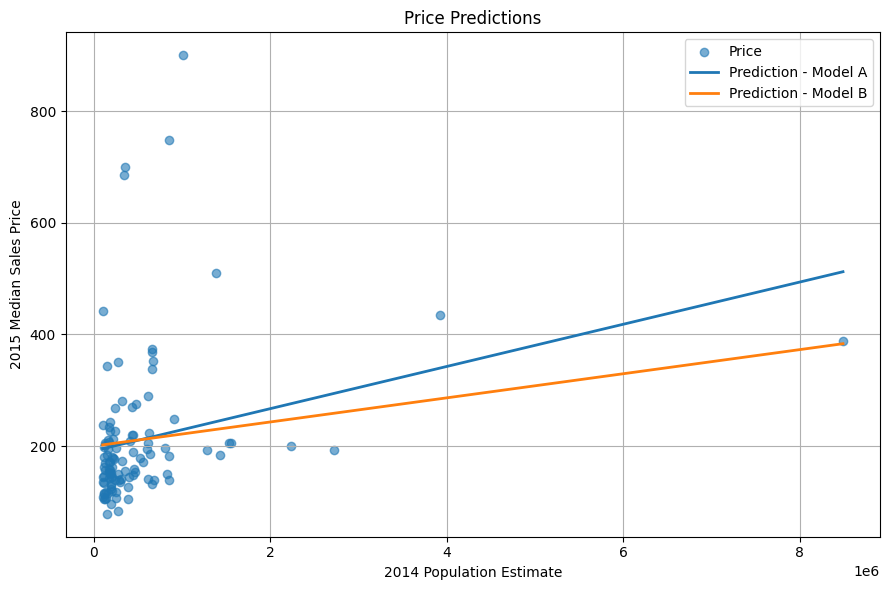

In [25]:
# Hiển thị kết quả cần thiết
# 1) Trích các cột cần thiết từ predictionsA và predictionsB
dfA = predictionsA.select(
    vector_to_array("features")[0].alias("pop"),
    "label",
    "prediction"  # prediction của A
).withColumnRenamed("prediction", "predA")

dfB = predictionsB.select(
    vector_to_array("features")[0].alias("pop"),
    "prediction"  # prediction của B
).withColumnRenamed("prediction", "predB")

# 2) Join về cùng một DataFrame để đảm bảo canh hàng
plot_df = dfA.join(dfB, on="pop", how="inner")

# 3) Đưa về pandas
pdf = plot_df.toPandas()

# 4) Chuẩn bị dữ liệu numpy
x     = pdf["pop"].to_numpy(dtype=float)
y     = pdf["label"].to_numpy(dtype=float)
predA = pdf["predA"].to_numpy(dtype=float)
predB = pdf["predB"].to_numpy(dtype=float)

# 5) Sắp xếp theo x để vẽ đường dự đoán mượt
order  = np.argsort(x)
x_line = x[order]
y_scatter = y  # scatter không cần sắp xếp
predA_line = predA[order]
predB_line = predB[order]

# 6) Vẽ: scatter thực tế + 2 đường dự đoán
plt.figure(figsize=(9, 6))
plt.scatter(x, y_scatter, alpha=0.6, label="Price")
plt.plot(x_line, predA_line, linewidth=2, label="Prediction - Model A")
plt.plot(x_line, predB_line, linewidth=2, label="Prediction - Model B")
plt.xlabel("2014 Population Estimate")
plt.ylabel("2015 Median Sales Price")
plt.title("Price Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()